# Optimize MMCQ algorithm

## MMCQ
- https://github.com/muthuspark/median-cut-color-quantization/blob/master/mcquantizer.py
- https://github.com/kanghyojun/mmcq.py/blob/master/mmcq/palette.py

In [1]:
import cv2
import time
import datetime
import numpy as np
import tkinter as Tk
from PIL import ImageFont, ImageDraw, Image
from threading import Thread
from queue import Queue
import datetime
import os
import zipfile
from sklearn.cluster import KMeans
import collections
import io
from matplotlib import pyplot as plt
import matplotlib
import time
from tqdm import tqdm as tqdm
matplotlib.use("Agg")

%matplotlib inline

In [2]:
from mmcq_numba.quantize import mmcq

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.64it/s]


0:00:00.364817
23244 (207, 212, 216) #cfd4d8
13834 (56, 126, 158) #387e9e
24223 (32, 41, 35) #202923
5619 (170, 152, 40) #aa9828
13282 (115, 157, 185) #739db9
2159 (106, 88, 58) #6a583a
2008 (162, 147, 146) #a29392


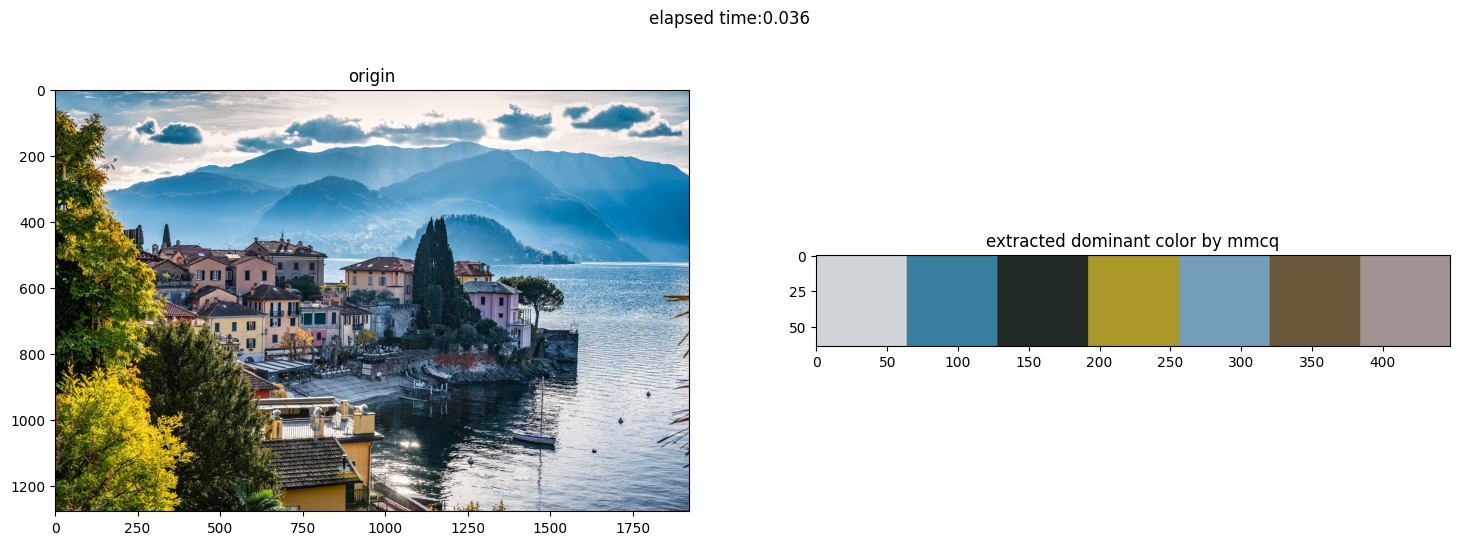

In [4]:
color_count = 8
quantize = 5
rgb = sample.convert('RGB')
times = []

path = "images/varenna-g2041fb6e5_1920.jpg"
rgb = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
s = datetime.datetime.now()
for k in tqdm(range(10)):
    start = time.time()
    width,height,c = rgb.shape
    rgb_resize = cv2.resize(rgb, (width//quantize, height//quantize))
    width,height,c = rgb_resize.shape
    colors = rgb_resize.reshape(width*height, c).astype(np.int64)
    #print("reshape:",time.time()-start)
    """
    colors = []
    start = time.time()
    for x in range(0, rgb.width, 5):
        for y in range(0, rgb.height, 5):
            rgb_color = rgb.getpixel((x, y))
            colors.append(rgb_color)
    colors = np.array(colors, dtype=np.int64)
    """
    #print("pickup:",time.time()-start)
    c_map = mmcq(colors, color_count)
    times.append(time.time()-start)
    
print(datetime.datetime.now() - s)
for vbox in c_map.vboxes:
    print(vbox["vbox"]._count, vbox["color"], '#%02x%02x%02x' % tuple(vbox["color"]))
    
IMG_SIZE = 64
MARGIN = 0
width = IMG_SIZE * (color_count-1) + MARGIN * 2
height = IMG_SIZE + MARGIN * 2
tiled_color_img = Image.new(
    mode='RGB', size=(width, height), color='#333333')
for i,vbox in enumerate(c_map.vboxes):
    color_hex_str = '#%02x%02x%02x' % tuple(vbox["color"])
    color_img = Image.new(
        mode='RGB', size=(IMG_SIZE, IMG_SIZE),
        color=color_hex_str)
    tiled_color_img.paste(
        im=color_img,
        box=(MARGIN + IMG_SIZE * i, MARGIN))
    
gs=plt.GridSpec(1,2)
plt.figure(figsize=(18,6))
plt.suptitle(f"elapsed time:{np.mean(times):.3f}")
plt.subplot(gs[0,0])
plt.title("origin")
plt.imshow(sample)
plt.subplot(gs[0,1])
plt.title("extracted dominant color by mmcq")
plt.imshow(tiled_color_img)
plt.show()

## origin performance

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

pickup: 0.07706379890441895


 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.76it/s]

pickup: 0.07738661766052246


 20%|████████████████▌                                                                  | 2/10 [00:00<00:02,  2.77it/s]

pickup: 0.07657289505004883


 30%|████████████████████████▉                                                          | 3/10 [00:01<00:02,  2.75it/s]

pickup: 0.07699775695800781


 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:02,  2.76it/s]

pickup: 0.07854223251342773


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  2.76it/s]

pickup: 0.0765984058380127


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:02<00:01,  2.77it/s]

pickup: 0.07853865623474121


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:02<00:01,  2.76it/s]

pickup: 0.07630634307861328


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:02<00:00,  2.78it/s]

pickup: 0.0769953727722168


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:03<00:00,  2.79it/s]

pickup: 0.07750701904296875


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.78it/s]


0:00:03.602969
22330 (209, 214, 217) #d1d6d9
13855 (55, 126, 159) #377e9f
24800 (30, 39, 34) #1e2722
5076 (173, 156, 41) #ad9c29
13065 (115, 157, 185) #739db9
2135 (106, 87, 56) #6a5738
1950 (163, 148, 146) #a39492


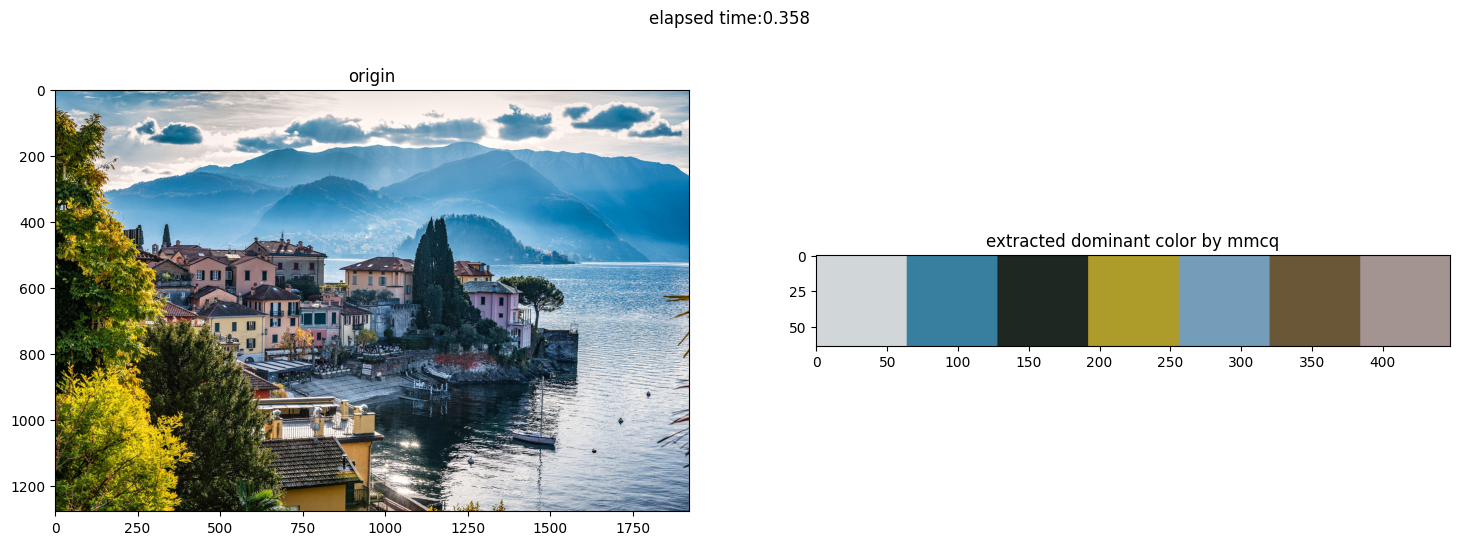

In [5]:
from mmcq.quantize import mmcq

sample = Image.open(path)

color_count = 8
rgb = sample.convert('RGB')
times = []
s = datetime.datetime.now()
for k in tqdm(range(10)):
    colors = []
    start = time.time()
    for x in range(0, rgb.width, 5):
        for y in range(0, rgb.height, 5):
            rgb_color = rgb.getpixel((x, y))
            colors.append(rgb_color)
    print("pickup:",time.time()-start)
    c_map = mmcq(colors, color_count)
    times.append(time.time()-start)
    
print(datetime.datetime.now() - s)
for vbox in c_map.vboxes:
    print(vbox["vbox"]._count, vbox["color"], '#%02x%02x%02x' % tuple(vbox["color"]))
    
IMG_SIZE = 64
MARGIN = 0
width = IMG_SIZE * (color_count-1) + MARGIN * 2
height = IMG_SIZE + MARGIN * 2
tiled_color_img = Image.new(
    mode='RGB', size=(width, height), color='#333333')
for i,vbox in enumerate(c_map.vboxes):
    color_hex_str = '#%02x%02x%02x' % tuple(vbox["color"])
    color_img = Image.new(
        mode='RGB', size=(IMG_SIZE, IMG_SIZE),
        color=color_hex_str)
    tiled_color_img.paste(
        im=color_img,
        box=(MARGIN + IMG_SIZE * i, MARGIN))
    
gs=plt.GridSpec(1,2)
plt.figure(figsize=(18,6))
plt.suptitle(f"elapsed time:{np.mean(times):.3f}")
plt.subplot(gs[0,0])
plt.title("origin")
plt.imshow(sample)
plt.subplot(gs[0,1])
plt.title("extracted dominant color by mmcq")
plt.imshow(tiled_color_img)
plt.show()

In [12]:
0.493 / 0.07

7.042857142857142